## EDA of one audio file

In [1]:
# import relevant libraries
import tarfile
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import pandas as pd
import pickle

In [2]:
# extract audio file
# with tarfile.open('C:/Users/marce/OneDrive/Dokumente/Master/CBS/2nd semester/ML/Project/Music/moodtheme_audio/autotagging_moodtheme_audio-00.tar', 'r') as tar:
#     # extract all files in the tar file
#     tar.extractall('C:/Users/marce/OneDrive/Dokumente/Master/CBS/2nd semester/ML/Project/Music/moodtheme_audio')

In [3]:
# !pip install --user numpy==1.21

In [4]:
# !pip install --user --upgrade numpy
# !pip install --user --upgrade numba


In [5]:
# importing 1 examplary file
y, sr = librosa.load('moodtheme_audio/00/7400.mp3')

print('Mp3-audio represented in numpy array', y, '\n')
print('Number of amplitude values:', np.shape(y)[0], '\n')
print('Sample Rate (amplitude values per second in Hz):', sr, '\n')

C:\Users\marce\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mp3-audio represented in numpy array [-7.1033835e-05 -1.2492016e-04 -1.8467382e-04 ... -7.6801189e-07
  1.7133607e-06 -1.0036852e-05] 

Number of amplitude values: 3219300 

Sample Rate (amplitude values per second in Hz): 22050 



Each value in the numpy array y represents the amplitude of the audio waveform at a specific point in time. This amplitude value is one sample of the audio waveform.

The sample rate sr is the number of samples per second used to represent the audio waveform. It specifies how many times the amplitude of the audio waveform is measured in one second. The sample rate is typically measured in Hertz (Hz).

We can check if the audio file was loaded correctly by calculating the length of the audio in seconds.

In [6]:
print(len(y)/sr, 's')

146.0 s


<img src="https://imgur.com/YPVEBnG.png" title="source: imgur.com" />

Together, the numpy array y and sample rate sr allow us to represent the audio waveform as a time-varying sequence of amplitude values. The amplitude corresponds to the air pressure at a given point in time. The higher the air pressure and the louder the corresponding sound.

Text(108.625, 0.5, 'Amplitude scaled to [-1,1]')

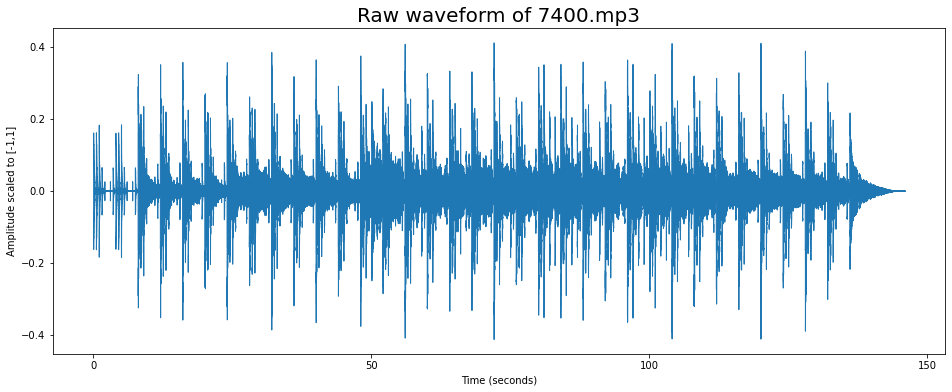

In [7]:
# plot raw waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = y, sr = sr, axis = 's')
plt.title('Raw waveform of 7400.mp3', fontsize = 20)
plt.ylabel('Amplitude scaled to [-1,1]')

Text(0.5, 1.0, 'Raw waveform of 7400.mp3 - short excerpt')

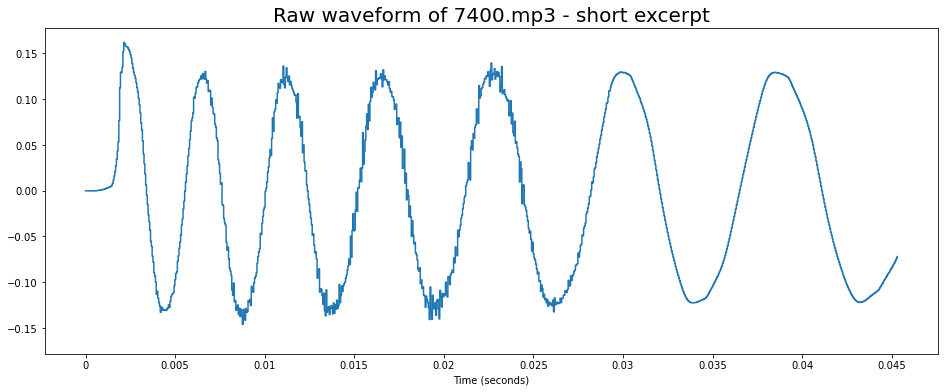

In [8]:
# plot short excerpt of raw waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = y[0:1000], sr = sr, axis='s');
plt.title('Raw waveform of 7400.mp3 - short excerpt', fontsize = 20)

### Transform into Mel-Spectrogram

In [9]:
# define variables
sample_rate = 22050
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

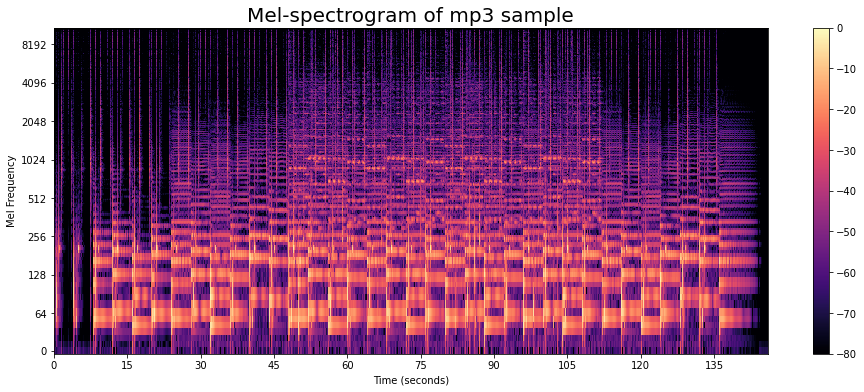

In [18]:
# transform y into mel-spectrogram
y_melspec = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# plot mel-spectrogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(y_melspec, sr = sr, hop_length = hop_length, x_axis = 's', y_axis = 'log')
ax = plt.gca()
ax.set_ylabel('Mel Frequency')
plt.colorbar()
plt.title('Mel-spectrogram of mp3 sample', fontsize = 20)
plt.show()

### Transform into Mel Frequency Cepstral Coefficients (MFCC)

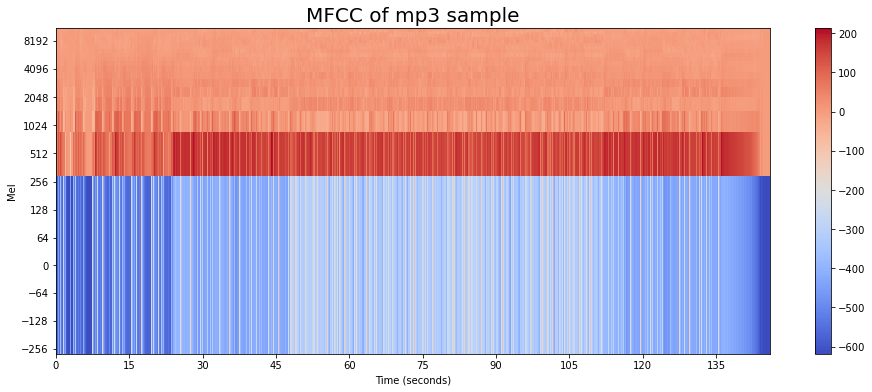

In [17]:
# transform y into MFCC
y_mfcc = librosa.feature.mfcc(y=y, sr=sr)

# plot MFCC
plt.figure(figsize = (16, 6))
librosa.display.specshow(y_mfcc, sr = sr, hop_length = hop_length, x_axis = 's', y_axis = 'log')
ax = plt.gca()
ax.set_ylabel('Mel')
plt.colorbar()
plt.title('MFCC of mp3 sample', fontsize = 20)
plt.show()